In [2]:
import json 
import matplotlib.pyplot as plt 

In [7]:
train_file = "../data/lince/ner/train.conll"

In [25]:
lid_dist = {
    'hi': 0, 
    'en': 0, 
    'rest': 0,
}

tag_dist = {
    "O": 0, 
    "B-PERSON": 0, 
    "I-PERSON": 0, 
    "B-ORGANISATION": 0, 
    "I-ORGANISATION": 0, 
    "B-PLACE": 0, 
    "I-PLACE": 0,
}

In [26]:
example = {
        "id": 0, 
        "sentence": [], 
        "lid": [], 
        "bio_tag": [],
    }

data = []

with open(train_file, "r") as inFile:
    for line in inFile.readlines():
        if line == "\n":
            data.append(example)

            example = {
                "id": 0, 
                "sentence": [], 
                "lid": [], 
                "bio_tag": [],
            }


            pass  

        sp = line.split()

        if len(sp) == 4 and sp[0] == "#" and sp[1] == "sent_enum":
            example['id'] = sp[3]
        
        elif len(sp) == 3:
            example['sentence'].append(sp[0])
            example['lid'].append(sp[1])
            example['bio_tag'].append(sp[2])

            lid_dist[sp[1]] += 1
            tag_dist[sp[2]] += 1
        

In [40]:
print(f'Training Examples: {len(data)}')

Training Examples: 1243


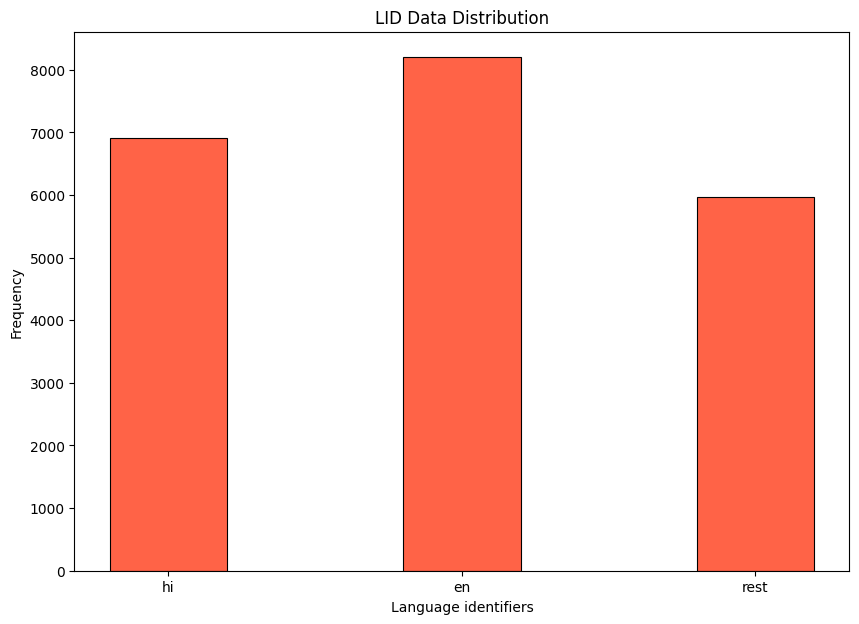

In [42]:
plt.figure(figsize=(10, 7))

plt.bar(lid_dist.keys(), lid_dist.values(), color='tomato', width=0.4, edgecolor='black', linewidth=0.8)
plt.ylabel('Frequency')
plt.xlabel('Language identifiers')
plt.title('LID Data Distribution')

plt.savefig('../assets/lince_lid_dist.png', dpi=700, format='png')

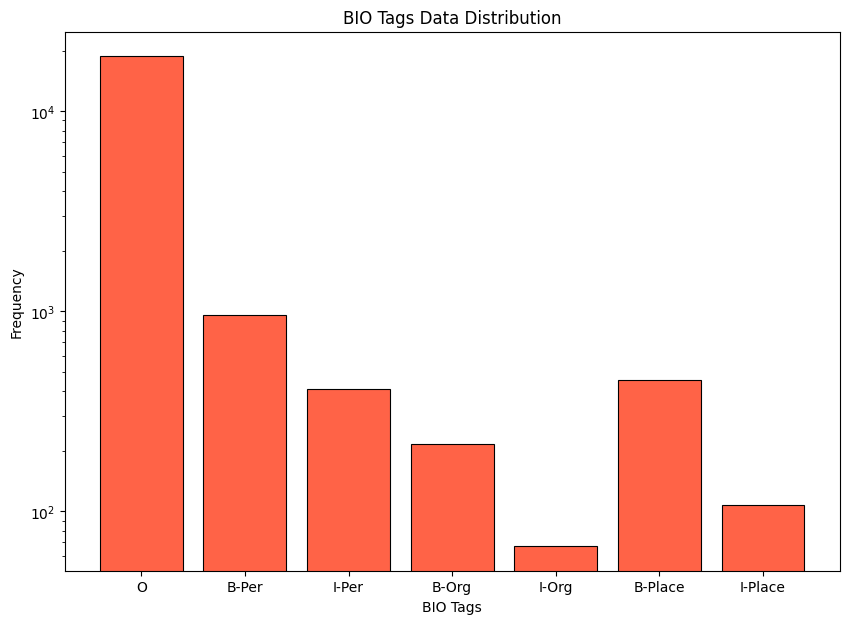

In [50]:
plt.figure(figsize=(10, 7))

plt.bar(tag_dist.keys(), tag_dist.values(), color='tomato', width=0.8, edgecolor='black', linewidth=0.8, tick_label=['O', 'B-Per', 'I-Per', 'B-Org', 'I-Org', 'B-Place', 'I-Place'])
plt.ylabel('Frequency')
plt.xlabel('BIO Tags')
plt.title('BIO Tags Data Distribution')
plt.yscale('log')

plt.savefig('../assets/lince_tag_dist.png', dpi=700, format='png')

In [52]:
with open('../data/lince/ner/train.json', 'w') as pFile:
    json_data = {
        'version': '1.0.0',
        'data': data,
    }

    json.dump(json_data, pFile, indent=2)
    pFile.close()

In [53]:
val_file = "../data/lince/ner/dev.conll"

In [54]:
example = {
        "id": 0, 
        "sentence": [], 
        "lid": [], 
        "bio_tag": [],
    }

data = []

with open(val_file, "r") as inFile:
    for line in inFile.readlines():
        if line == "\n":
            data.append(example)

            example = {
                "id": 0, 
                "sentence": [], 
                "lid": [], 
                "bio_tag": [],
            }


            pass  

        sp = line.split()

        if len(sp) == 4 and sp[0] == "#" and sp[1] == "sent_enum":
            example['id'] = sp[3]
        
        elif len(sp) == 3:
            example['sentence'].append(sp[0])
            example['lid'].append(sp[1])
            example['bio_tag'].append(sp[2])

In [57]:
with open('../data/lince/ner/val.json', 'w') as pFile:
    json_data = {
        'version': '1.0.0',
        'data': data,
    }

    json.dump(json_data, pFile, indent=2)
    pFile.close()